# Loading datasets

In [1]:
import pandas as pd

# create dataframes
try:
    avro_issues = pd.read_csv('../data/original/avro-issues.csv')
    avro_transitions = pd.read_csv('../data/original/avro-transitions.csv')
    avro_daycounts = pd.read_csv('../data/original/avro-daycounts.csv')
except FileNotFoundError as e:
    print(e.strerror)

In [2]:
avro_issues.head(n=2) # show the first two rows

status priority                       updated   issue_type  \
0  In Progress    Major  2018-04-21T15:44:36.749+0000  Improvement   
1  In Progress    Minor  2018-04-21T15:42:40.935+0000  Improvement   

     reporter                       created resolutiondate  vote_count  \
0  rlenferink  2018-04-17T21:53:05.730+0000            NaN           0   
1  rlenferink  2018-04-17T21:47:11.197+0000            NaN           0   

  project    assignee  comment_count        key  description_length  \
0    AVRO  rlenferink              1  AVRO-2171               233.0   
1    AVRO  rlenferink              1  AVRO-2170               528.0   

   summary_length  watch_count resolution  days_in_current_status  
0              43            1        NaN                4.643599  
1              68            2        NaN                4.644939

In [3]:
avro_transitions.head(n=2) # show the first two rows

status                       updated from_status    reporter  \
0  In Progress  2018-04-21T15:44:36.749+0000         NaN  rlenferink   
1  In Progress  2018-04-21T15:44:36.749+0000        Open  rlenferink   

                           when  days_in_from_status         who  \
0  2018-04-17T21:53:05.730+0000                  NaN  rlenferink   
1  2018-04-18T01:33:49.088+0000              0.15328      busbey   

         to_status    assignee        key  ...  project  \
0             Open  rlenferink  AVRO-2171  ...     AVRO   
1  Patch Available  rlenferink  AVRO-2171  ...     AVRO   

                        created               transition  resolutiondate  \
0  2018-04-17T21:53:05.730+0000     Non-existent to Open             NaN   
1  2018-04-17T21:53:05.730+0000  Open to Patch Available             NaN   

  comment_count priority vote_count   issue_type  watch_count resolution  
0             1    Major          0  Improvement            1        NaN  
1             1    Major          0  Improvement            1        NaN  

[2 rows x 24 columns]

In [5]:
avro_daycounts.head(n=4) # show the first four rows

day           status  count
0  2009-04-09T22:09:08.216000+00:00         Resolved      0
1  2009-04-09T22:09:08.216000+00:00      In Progress      0
2  2009-04-09T22:09:08.216000+00:00  Patch Available      0
3  2009-04-09T22:09:08.216000+00:00         Reopened      0

# Data Understanding

## Dataset avro-issues.csv

- **status**: the current status of the issue (at moment of export)
- **priority**: issue priority
- **updated**: the last time this issue was updated (note, this updated is not necessarily as status change)
- **issue_type**: the type of issue (bug, feature, etc.)
- **reporter**: username of the issue reporter
- **created**: date the issue was created
- **resolutiondate**: date the issue was resolved if it ever reached that status
- **vote_count**: number of votes on the issue
- **project**: project the issue belongs to
- **assignee**: username of the assignee if assigned to anyone
- **comment_count**: number of comments on the issue
- **key**: issue key; this is the unique identifier
- **watch_count**: number of watchers on this issue
- **resolution**: resolution to the issue (e.g. FIXED or WONTFIX, etc.)
- **days_in_current_status**: number of days the issue has been in the current status at the time of export

In [24]:
avro_issues.describe()

vote_count  comment_count  description_length  summary_length  \
count  2166.000000    2166.000000         2073.000000     2166.000000   
mean      0.281625       5.716066          697.887120       52.825946   
std       1.354866       7.595926         1054.484083       20.968528   
min       0.000000       0.000000           15.000000        8.000000   
25%       0.000000       2.000000          182.000000       38.000000   
50%       0.000000       4.000000          353.000000       51.000000   
75%       0.000000       7.000000          788.000000       65.000000   
max      36.000000      97.000000        17439.000000      186.000000   

       watch_count  days_in_current_status  
count  2166.000000             2166.000000  
mean      2.337950             1884.993330  
std       3.135038              972.131416  
min       0.000000                2.025288  
25%       1.000000              926.980462  
50%       2.000000             2038.413314  
75%       3.000000             2786.419177  
max      74.000000             3288.421389

In [35]:
avro_issues.dtypes

status                     object
priority                   object
updated                    object
issue_type                 object
reporter                   object
created                    object
resolutiondate             object
vote_count                  int64
project                    object
assignee                   object
comment_count               int64
key                        object
description_length        float64
summary_length              int64
watch_count                 int64
resolution                 object
days_in_current_status    float64
dtype: object

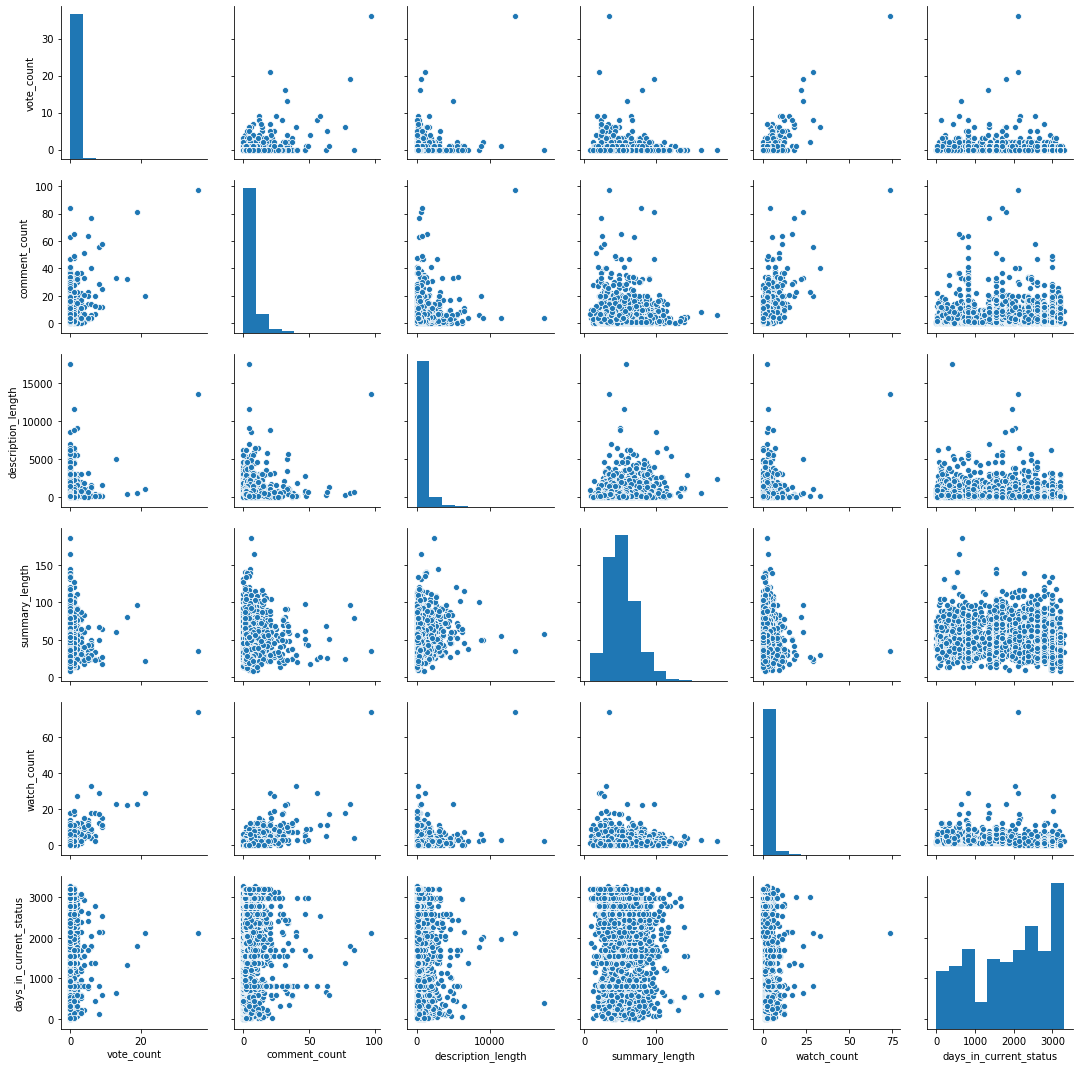

In [25]:
sns.pairplot(avro_issues) # plotting data / checking for outliers

## Dataset avro-transitions.csv
- **from_status**, the status that the issue had before the transition
- **when**, when the transition happened
- **days_in_from_status**, number of days the issue was in the from_status before this transition
- **who**, who did the transition
- **to_status**, the status the issue had after the transition
- **days_since_open**, number of days since the issue was opened
- **transition**, a text string that contains at least both the from_status and the to_status (useful for histogramming all transitions)

In [27]:
avro_transitions.describe()

days_in_from_status  description_length  summary_length  \
count          4094.000000         5974.000000     6260.000000   
mean             53.687721          642.830264       52.152875   
std             156.839412         1028.241389       20.607589   
min               0.000031           15.000000        8.000000   
25%               0.566558          162.000000       37.000000   
50%               8.271514          319.000000       50.000000   
75%              42.216723          697.000000       64.000000   
max            2175.533870        17439.000000      186.000000   

       days_in_current_status  days_since_open  comment_count   vote_count  \
count             6260.000000      4094.000000    6260.000000  6260.000000   
mean              2027.239254        87.182320       6.663419     0.211342   
std                928.712810       215.741525       8.101468     1.016040   
min                  2.025295         0.000072       0.000000     0.000000   
25%               1371.454933         1.012025       2.000000     0.000000   
50%               2262.267312        16.038566       4.000000     0.000000   
75%               2873.232207        76.983925       8.000000     0.000000   
max               3288.421399      2221.827884      97.000000    36.000000   

       watch_count  
count  6260.000000  
mean      2.260863  
std       2.857678  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       3.000000  
max      74.000000

In [34]:
avro_transitions.dtypes

status                     object
updated                    object
from_status                object
reporter                   object
when                       object
days_in_from_status       float64
who                        object
to_status                  object
assignee                   object
key                        object
description_length        float64
summary_length              int64
days_in_current_status    float64
days_since_open           float64
project                    object
created                    object
transition                 object
resolutiondate             object
comment_count               int64
priority                   object
vote_count                  int64
issue_type                 object
watch_count                 int64
resolution                 object
dtype: object

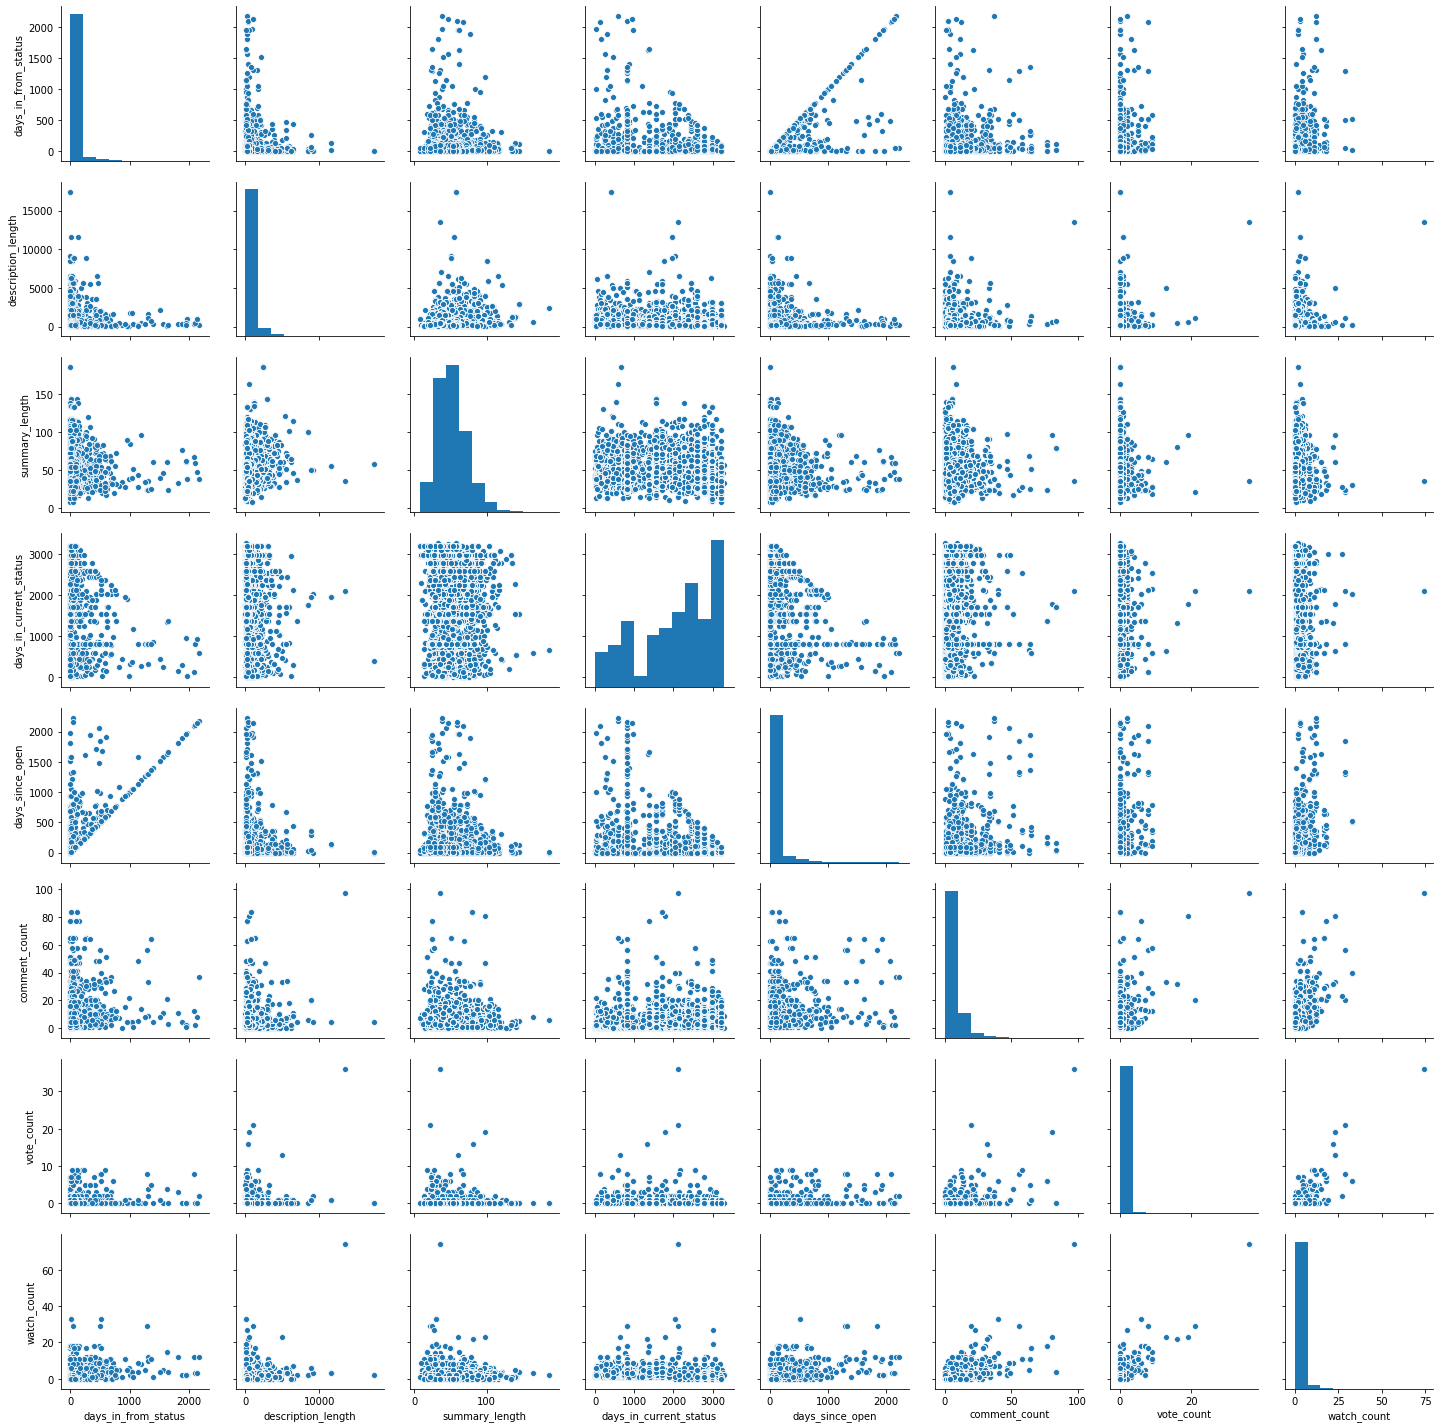

In [29]:
sns.pairplot(avro_transitions)  # plotting data / checking for outliers

## Dataset avro-daycounts.csv
- **day**, the day for which this count is (e.g. 2013-02-23)
- **status**, the status for which the count is
- **count**, the number of issues in given status on day


In [31]:
avro_daycounts.describe()

count
count  19812.000000
mean     216.977488
std      357.124458
min        0.000000
25%        3.000000
50%       41.000000
75%      242.000000
max     1236.000000

In [36]:
avro_daycounts.dtypes

day       object
status    object
count      int64
dtype: object

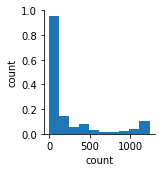

In [33]:
sns.pairplot(avro_daycounts)  # plotting data 